<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>
**N2 - Análise Exploratória - Movie Lens**<br/>
<br/>
Alunos(a): <br/>Fabiana Luizon Martins Campos  <br/> Gustavo Florêncio Lima Simião <br/>

---

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
# URLs com o dataset para análise
url_movies = "https://raw.githubusercontent.com/fabii2607/exploratoryAnalysis/refs/heads/main/movies.csv"
url_links = "https://raw.githubusercontent.com/fabii2607/exploratoryAnalysis/refs/heads/main/links.csv"
url_ratings = "https://raw.githubusercontent.com/fabii2607/exploratoryAnalysis/refs/heads/main/ratings.csv"
url_tags = "https://raw.githubusercontent.com/fabii2607/exploratoryAnalysis/refs/heads/main/tags.csv"

In [3]:
movies = pd.read_csv(url_movies)
ratings = pd.read_csv(url_ratings)
links = pd.read_csv(url_links)
tags = pd.read_csv(url_tags)

# **MOVIES** 🎥

In [4]:
# Importando dataset do repositório do GitHub
df_movies = pd.read_csv(url_movies)

In [5]:
# Renomeando as colunas
df_movies = df_movies.rename(columns={'movieId': 'Filme_ID', 'title': 'Título', 'genres': 'Gênero'})

In [6]:
# Imprimindo Cabeçario
df_movies.head()

,Filme_ID,Título,Gênero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# **LINKS** 🔗

In [7]:
# Importando dataset do repositório do GitHub
df_links = pd.read_csv(url_links)

In [8]:
# Renomeando as colunas
df_links = df_links.rename(columns={'movieId': 'Filme_ID', 'imdbId': 'IMDb_ID', 'tmdbId': 'TMBd_ID'})

In [9]:
# Imprimindo Cabeçario
df_links.head()

,Filme_ID,IMDb_ID,TMBd_ID
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# **RATINGS** 💯

In [10]:
# Importando dataset do repositório do GitHub
df_ratings = pd.read_csv(url_ratings)

In [11]:
# Tranformando o formato Unix Timestamp para o formato de Data e Hora tradicional
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s') #yyyy/mm/dd hh:mm:ss
df_ratings['timestamp'] = df_ratings['timestamp'].dt.strftime('%d/%m/%Y %H:%M:%S') #dd/mm/yyyy hh:mm:ss

In [12]:
# Renomeando as colunas
df_ratings = df_ratings.rename(columns={'userId': 'Usuário_ID', 'movieId': 'Filme_ID', 'rating': 'Avaliação', 'timestamp': 'Data_e_Hora'})

In [13]:
# Imprimindo Cabeçario
df_ratings.head()

,Usuário_ID,Filme_ID,Avaliação,Data_e_Hora
0,1,1,4.0,30/07/2000 18:45:03
1,1,3,4.0,30/07/2000 18:20:47
2,1,6,4.0,30/07/2000 18:37:04
3,1,47,5.0,30/07/2000 19:03:35
4,1,50,5.0,30/07/2000 18:48:51


# **TAGS** 🎫

In [14]:
# Importando dataset do repositório do GitHub
df_tags = pd.read_csv(url_tags)

In [15]:
# Tranformando o formato Unix Timestamp para o formato de Data e Hora tradicional
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s') #yyyy/mm/dd hh:mm:ss
df_tags['timestamp'] = df_tags['timestamp'].dt.strftime('%d/%m/%Y %H:%M:%S') #dd/mm/yyyy hh:mm:ss

In [16]:
# Renomeando as colunas
df_tags = df_tags.rename(columns={'userId': 'Usuário_ID', 'movieId': 'Filme_ID', 'tag': 'Tag', 'timestamp': 'Data_e_Hora'})

In [17]:
# Imprimindo Cabeçario
df_tags.head()

,Usuário_ID,Filme_ID,Tag,Data_e_Hora
0,2,60756,funny,24/10/2015 19:29:54
1,2,60756,Highly quotable,24/10/2015 19:29:56
2,2,60756,will ferrell,24/10/2015 19:29:52
3,2,89774,Boxing story,24/10/2015 19:33:27
4,2,89774,MMA,24/10/2015 19:33:20


# **1- Análise exploratória ✍**

# **A-** Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?


In [18]:
# Juntar os dados com base na coluna 'Filme_ID'
df_junt = pd.merge(df_ratings, df_movies, on='Filme_ID')


In [19]:
# 4. Extrair o ano do título do filme
def extrair_ano(titulo):
    match = re.search(r'\((\d{4})\)', titulo)
    if match:
        return int(match.group(1))
    return None

df_junt['Ano_Lancamento'] = df_junt['Título'].apply(extrair_ano)
df_junt = df_junt.dropna(subset=['Ano_Lancamento'])

In [20]:
# 5. Calcular média das avaliações por ano
media_por_ano = df_junt.groupby('Ano_Lancamento')['Avaliação'].mean().reset_index()

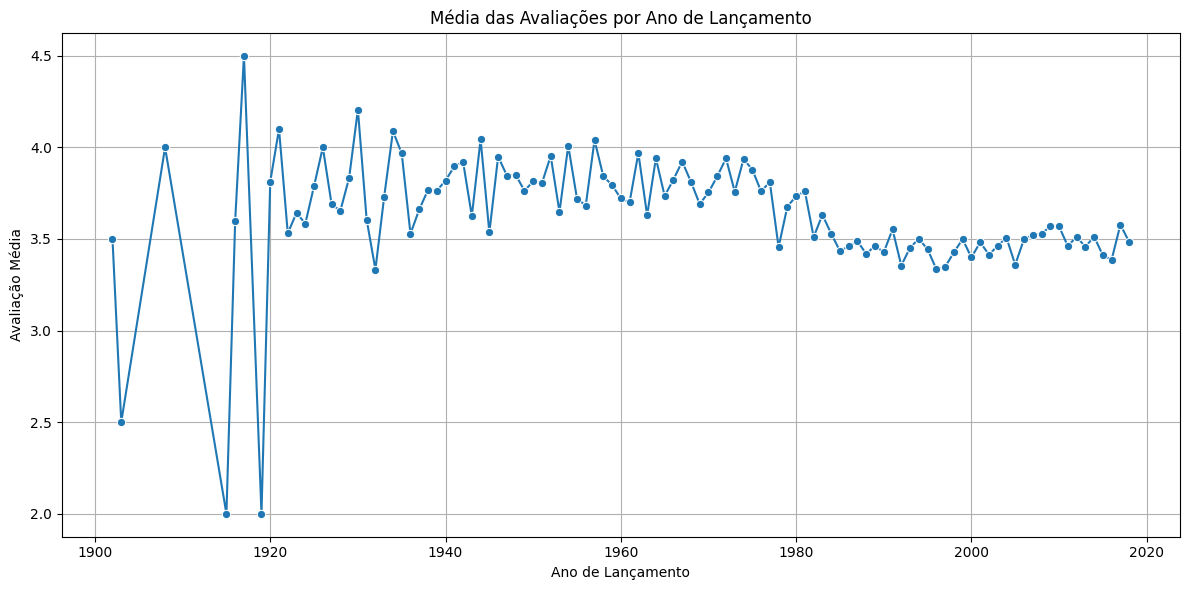

In [21]:
# 6. Plotar o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=media_por_ano, x='Ano_Lancamento', y='Avaliação', marker='o')
plt.title('Média das Avaliações por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# 7. Calcular correlação
correlacao = media_por_ano['Ano_Lancamento'].corr(media_por_ano['Avaliação'])
print(f"Correlação entre ano de lançamento e avaliação média: {correlacao:.2f}")

Correlação entre ano de lançamento e avaliação média: -0.16


🔥 Sim, existe uma correlação fraca e negativa entre o ano de lançamento do filme e sua avaliação média. A correlação calculada foi de aproximadamente -0.16, indicando que filmes mais recentes tendem a ter notas ligeiramente menores. No entanto, como a correlação é fraca, não é possível afirmar com certeza que o ano de lançamento influencia diretamente a nota média dos filmes.

**Analisando o gráfico:**

*   Antes de 1920, há grande variação nas notas, o que pode indicar que há poucos filmes dessa época no dataset.

* Entre 1920 e 1980, as avaliações se estabilizam em torno de 4.0.

* Após 1980, nota-se uma leve tendência de queda, com as médias se aproximando de 3.5.

Esse comportamento pode estar relacionado a diversos fatores, como o aumento da quantidade de filmes avaliados, mudanças no perfil dos espectadores ou maior diversidade de opiniões. Mesmo com essa tendência, a relação entre ano de lançamento e avaliação média não é forte o suficiente para tirar conclusões definitivas.

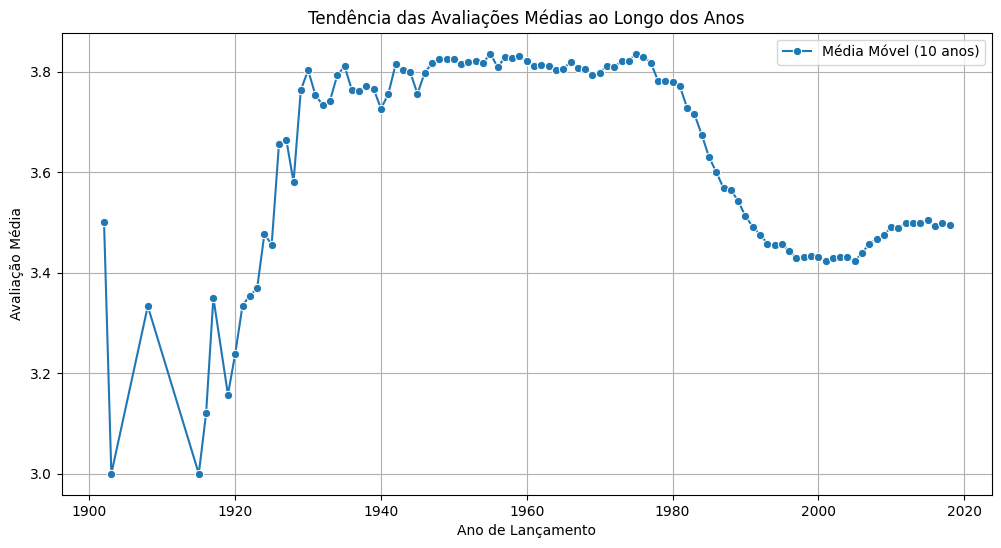

In [23]:
media_por_ano['Média_Móvel'] = media_por_ano['Avaliação'].rolling(window=10, min_periods=1).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=media_por_ano, x='Ano_Lancamento', y='Média_Móvel', marker='o', label='Média Móvel (10 anos)')
plt.title('Tendência das Avaliações Médias ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.legend()
plt.show()


**📊 1. Média Móvel (10 anos)** <br/>
O gráfico suaviza as oscilações e revela um padrão mais claro:

* Antes de 1920, as avaliações são muito instáveis devido à baixa quantidade de filmes.

* Entre 1920 e 1980, há uma tendência de crescimento, atingindo um pico em torno de 3.8.

* A partir dos anos 1980 até 2000, há uma queda acentuada na média das avaliações.

* Depois de 2000, a queda se estabiliza, com médias girando em torno de 3.4.

Isso sugere que os filmes mais antigos e clássicos costumam ter notas mais altas, enquanto os mais recentes tendem a ter médias menores.

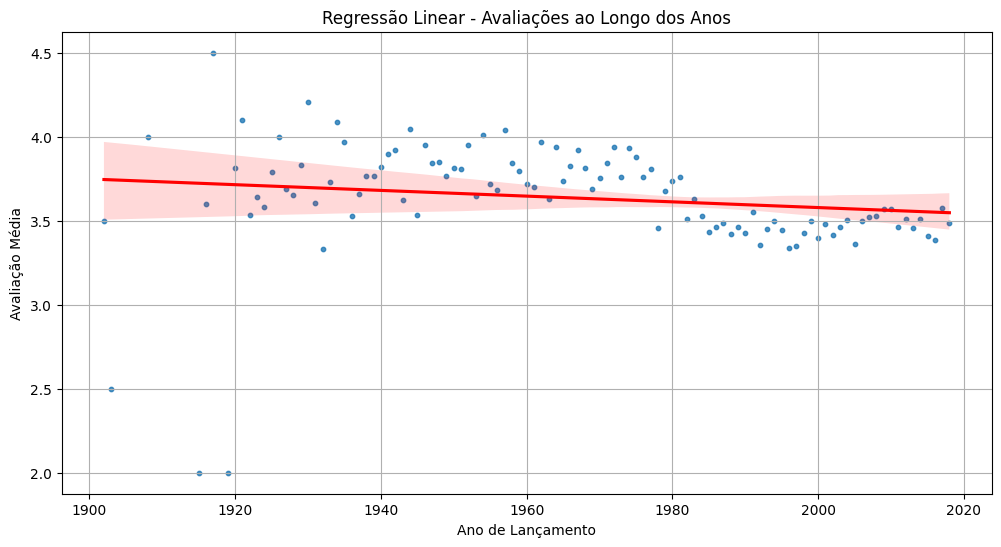

In [24]:
plt.figure(figsize=(12,6))
sns.regplot(data=media_por_ano, x='Ano_Lancamento', y='Avaliação', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regressão Linear - Avaliações ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.show()


**📉 2. Regressão Linear** <br/>
A reta vermelha confirma a tendência de queda ao longo dos anos, mas a inclinação não é muito forte. Isso confirma a correlação fraca de -0.16, indicando que o efeito do ano de lançamento sobre a nota não é tão significativo.

A regressão também mostra que:

* Filmes antigos (antes de 1950) têm variações mais extremas nas notas.

* Filmes mais novos apresentam médias mais estáveis, mas ligeiramente menores.

**🔎 Conclusão Final** <br/>
Os gráficos reforçam que, em média, filmes mais antigos recebem notas mais altas, enquanto os mais recentes tendem a ter avaliações menores. No entanto, a relação não é forte o suficiente para afirmar que apenas o ano de lançamento influencia a nota — outros fatores, como popularidade e público-alvo, podem estar envolvidos.


# **B-** Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes?


In [25]:
# Contar quantas avaliações e tags cada usuário fez
contagem_avaliacoes = df_ratings['Usuário_ID'].value_counts()
contagem_tags = df_tags['Usuário_ID'].value_counts()


In [26]:
# Calcular métricas de dispersão
dispersao_avaliacoes = contagem_avaliacoes.std()
dispersao_tags = contagem_tags.std()

In [27]:
# Exibir os valores de dispersão
print(f"Desvio padrão das avaliações por usuário: {dispersao_avaliacoes:.2f}")
print(f"Desvio padrão das tags por usuário: {dispersao_tags:.2f}")


Desvio padrão das avaliações por usuário: 269.48
Desvio padrão das tags por usuário: 215.12


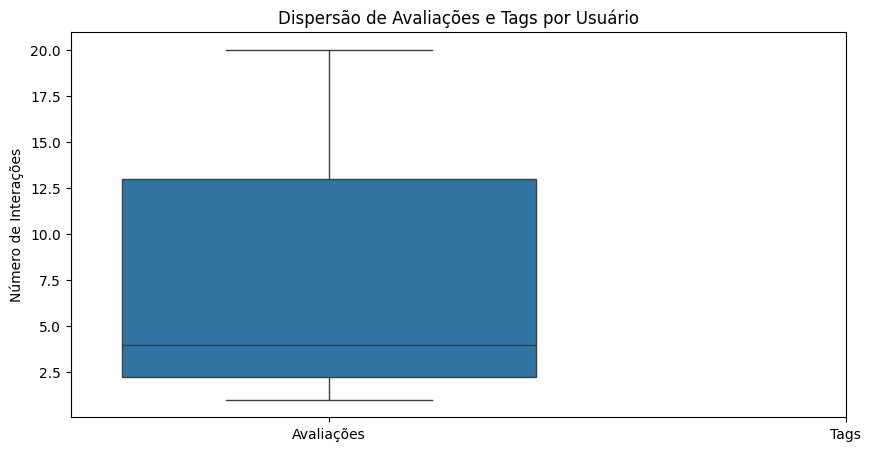

In [28]:
# Criar Boxplots para visualizar a dispersão
plt.figure(figsize=(10,5))
sns.boxplot(data=[contagem_avaliacoes, contagem_tags], showfliers=False)
plt.xticks([0, 1], ['Avaliações', 'Tags'])
plt.title("Dispersão de Avaliações e Tags por Usuário")
plt.ylabel("Número de Interações")
plt.show()

🔥 Com esses valores, podemos concluir que os usuários que avaliam os filmes são mais dispersos do que os usuários que adicionam tags.


* O desvio padrão indica o quão espalhados os valores estão em relação à média.

* O desvio padrão das avaliações (269.48) é maior que o das tags (215.12), mostrando que há uma variação maior no número de avaliações feitas por usuário.

Ou seja, enquanto algumas pessoas avaliam poucos filmes, outras avaliam muitos, criando uma distribuição mais dispersa.

Já no caso das tags, apesar de ainda haver variação, a diferença entre usuários extremos (quem adiciona muitas tags vs. quem adiciona poucas) é um pouco menor.

📌 Análise do Gráfico:
A caixa das avaliações é mais longa, indicando maior variabilidade nos dados.

Os valores extremos (outliers) sugerem que alguns usuários avaliam um número muito maior de filmes do que a maioria.

As tags possuem um intervalo menor, ou seja, os usuários tendem a rotular filmes de forma mais homogênea.

Com isso, podemos afirmar que o grupo dos usuários que avaliam os filmes tem uma dispersão maior do que o grupo dos usuários que adicionam tags, confirmando os valores do desvio padrão.

# **C-** Qual a categoria rotulada mais frequente?

In [29]:
# Contar a frequência de cada tag
tag_counts = df_tags['Tag'].value_counts()

In [30]:
# Exibir a tag mais frequente e sua contagem
most_common_tag = tag_counts.idxmax()
most_common_count = tag_counts.max()

print(f"A categoria rotulada mais frequente é '{most_common_tag}', com {most_common_count} ocorrências.")

A categoria rotulada mais frequente é 'In Netflix queue', com 131 ocorrências.


In [31]:
# Selecionar as 10 tags mais frequentes
top_tags = tag_counts.head(10)


<Axes: xlabel='Tag'>

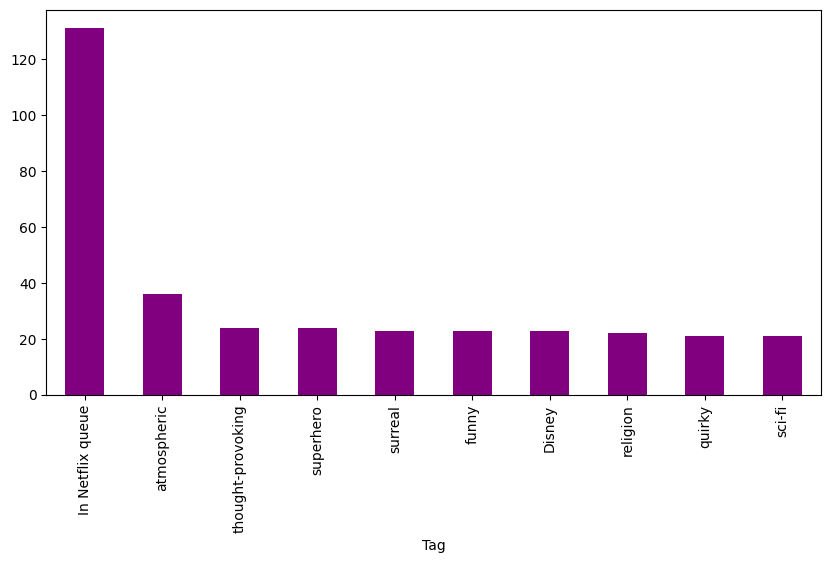

In [32]:
# Criar gráfico de barras
plt.figure(figsize=(10,5))
top_tags.plot(kind='bar', color='purple')

🍿 A categoria rotulada mais frequente entre os usuários é "In Netflix queue", com um total de 131 ocorrências

# **D-** Como estão distribuídas as avaliações ao longo do tempo?

In [33]:
# Converter a coluna 'Data_e_Hora' de string de volta para datetime para análise temporal
df_ratings['Data_e_Hora_DT'] = pd.to_datetime(df_ratings['Data_e_Hora'], format='%d/%m/%Y %H:%M:%S')

In [34]:
# Criar uma coluna de Ano-Mês
df_ratings['AnoMes'] = df_ratings['Data_e_Hora_DT'].dt.to_period('M')

In [35]:
# Contar número de avaliações por mês
avaliacoes_por_mes = df_ratings.groupby('AnoMes').size()

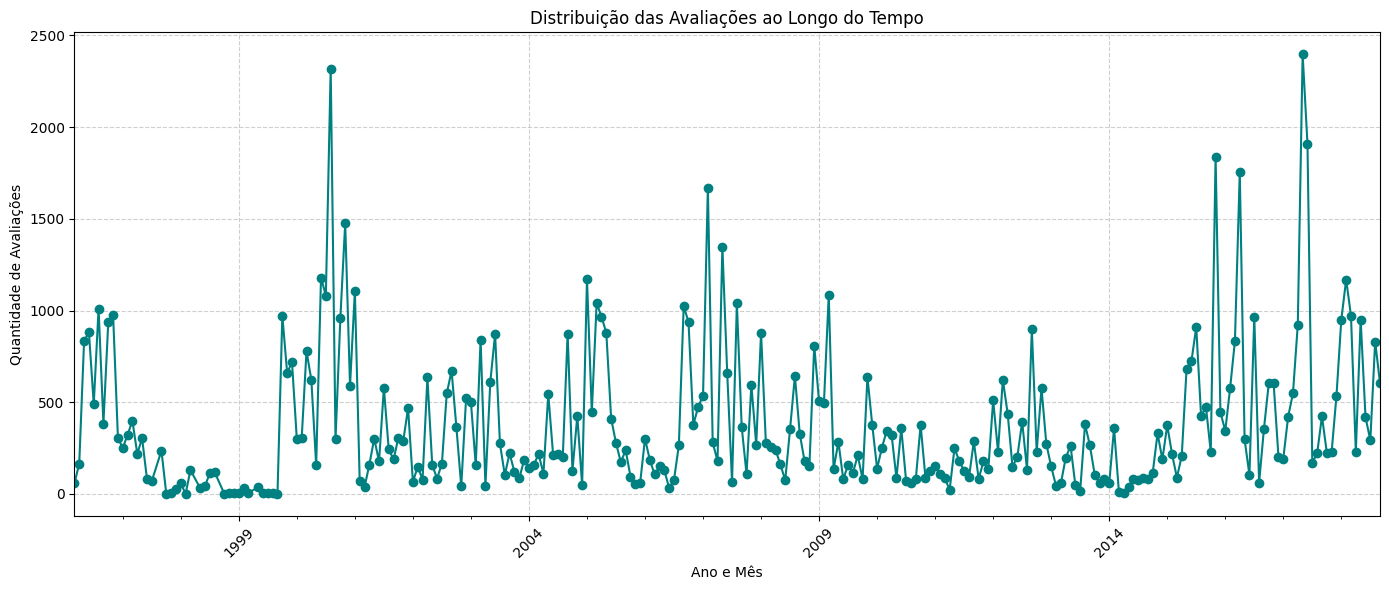

In [36]:
# Plotar o gráfico de distribuição
plt.figure(figsize=(14, 6))
avaliacoes_por_mes.plot(kind='line', marker='o', color='teal')
plt.title('Distribuição das Avaliações ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade de Avaliações')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🧮  O gráfico mostra a distribuição das avaliações ao longo do tempo, revelando uma variação significativa na quantidade de avaliações em diferentes períodos. Observa-se que, inicialmente, há um número baixo de avaliações, com alguns picos esporádicos. A partir dos anos 2000, a frequência das avaliações começa a aumentar, apresentando oscilações ao longo dos anos.  

Entre 2014 e 2018, há um crescimento notável na quantidade de avaliações registradas, atingindo picos mais elevados. Isso pode estar relacionado ao aumento do uso de plataformas de streaming e redes sociais para recomendações de filmes. No geral, o gráfico indica que a participação dos usuários foi se tornando mais ativa ao longo dos anos, especialmente na última década.

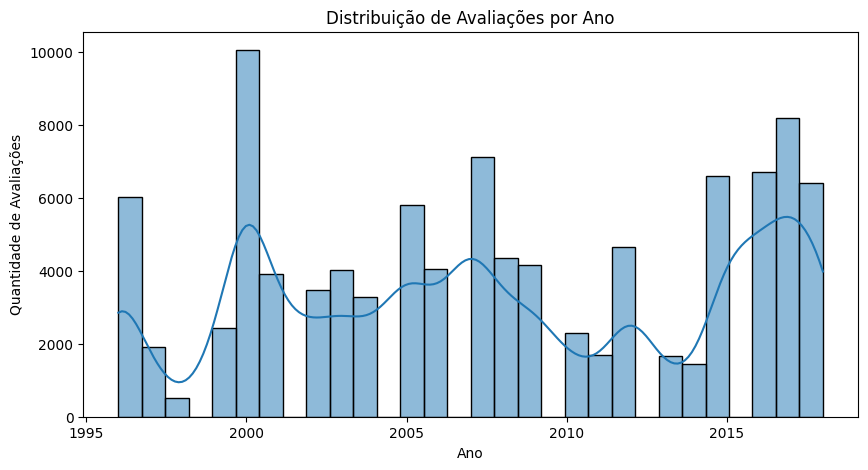

In [37]:
# Extrai o ano das avaliações
df_ratings['Ano'] = df_ratings['Data_e_Hora_DT'].dt.year
plt.figure(figsize=(10,5))
sns.histplot(df_ratings['Ano'], bins=30, kde=True)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avaliações')
plt.title('Distribuição de Avaliações por Ano')
plt.show()

📊 Este gráfico de barras, combinado com uma linha de suavização, mostra a quantidade de avaliações feitas a cada ano.

* Podemos observar altos e baixos, sugerindo que o número de avaliações não cresceu de maneira linear.

* O ano de 2000 apresenta um pico significativo, o que pode indicar um aumento no uso da plataforma ou uma base de usuários mais ativa nesse período.

* Após 2010, a quantidade de avaliações voltou a crescer

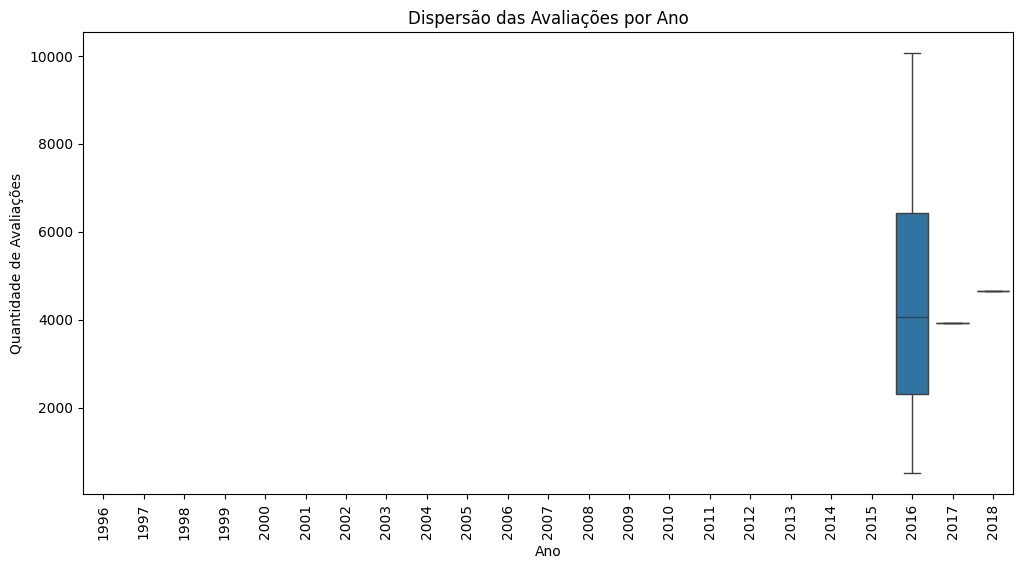

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_ratings['Ano'], y=df_ratings.groupby('Ano')['Avaliação'].count())
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avaliações')
plt.title('Dispersão das Avaliações por Ano')
plt.show()

🧰 Esse boxplot mostra a variação na quantidade de avaliações feitas por ano.

* O principal destaque é a maior concentração de avaliações a partir de 2016, com valores extremos que mostram uma grande dispersão dos dados.

* Isso indica que nos anos mais recentes houve um volume maior e mais variado de avaliações, possivelmente devido ao aumento da base de usuários ou a novos lançamentos de filmes.

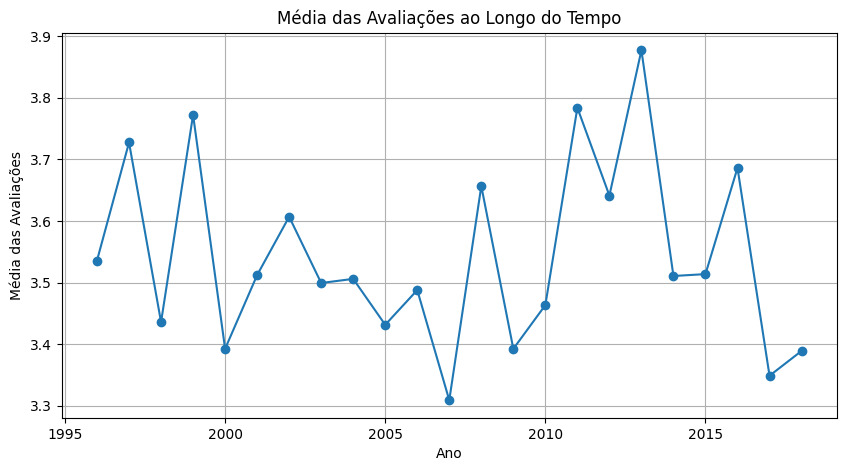

In [39]:
media_avaliacoes = df_ratings.groupby('Ano')['Avaliação'].mean()
plt.figure(figsize=(10,5))
plt.plot(media_avaliacoes.index, media_avaliacoes.values, marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Média das Avaliações')
plt.title('Média das Avaliações ao Longo do Tempo')
plt.grid()
plt.show()

🔥 Esse gráfico de linha mostra a média das notas atribuídas aos filmes ao longo dos anos.

* Entre 1995 e 2000, a média parece ser mais alta, em torno de 3.7 a 3.8.

* Depois de 2005, há uma maior oscilação, com períodos em que as notas médias caem e outros em que voltam a subir.

* O pico mais alto acontece por volta de 2010, quando a média das avaliações atinge quase 3.9.

* Nos últimos anos do gráfico, a média parece estar em declínio, o que pode indicar uma maior exigência dos usuários ou um aumento de avaliações mais baixas.

# **2- Perguntas e Respostas ⁉**

#Perguntas e Respostas Movies 🎥

**1-** Existe algum valor nulo na base de dados dos filmes? Em caso afirmativo, quais colunas possuem valores ausentes e quantos?


Para verificar a presença de valores ausentes, você pode usar o método isnull() combinado com sum(). O comando seria:​

In [40]:
df_movies.isnull().sum()


,0
Filme_ID,0
Título,0
Gênero,0


🔥 Resposta: Não existe nenhum valor nulo na base de dados dos filmes!

2-  Quantos filmes do gênero "Comedy" existem na base de dados?



In [41]:
numero_comed = df_movies[df_movies['Gênero'].fillna('').str.contains('Comedy')].shape[0]

In [42]:
print(f'O número total de filmes que têm \"Comedy\" em seus gêneros é: {numero_comed}')

O número total de filmes que têm "Comedy" em seus gêneros é: 3756


# **Perguntas e Respostas Ratings 💯**

1- Qual é a média geral das avaliações feitas por todos os usuários?


In [43]:
media_notas = df_ratings["Avaliação"].mean()

In [44]:
print(f'A média de todas notas dadas é de: {media_notas}')

A média de todas notas dadas é de: 3.501556983616962


2- Quantas avaliações com nota máxima (5.0) foram registradas?


In [45]:
notas_cinco = df_ratings[df_ratings["Avaliação"] == 5.0].shape[0]

In [46]:
print(f'O número total de avaliações em que a nota foi 5.0 é de {notas_cinco}')

O número total de avaliações em que a nota foi 5.0 é de 13211
